## Clustering and PCA 
    Arjun Singh Baghel

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Business Goal

- Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.
- Outlier Analysis: You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.
- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.
- Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 
- The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

In [590]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [591]:
# Reading "Country-data.csv"
country_Data = pd.DataFrame(pd.read_csv('Country-data.csv'))
country_Data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [592]:
country_Data.shape

(167, 10)

Data set having 167 row and 10 column

In [593]:
country_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Here we  can that there is no NULL value all columns having equal entries.

In [594]:
#  Data set description
country_Data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [595]:
# Check null data 
country_Data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [596]:
#checking duplicates
sum(country_Data.duplicated(subset = 'country')) == 0

True

Here we can see No duplicate values of 'country' variable.

### Data Analytics

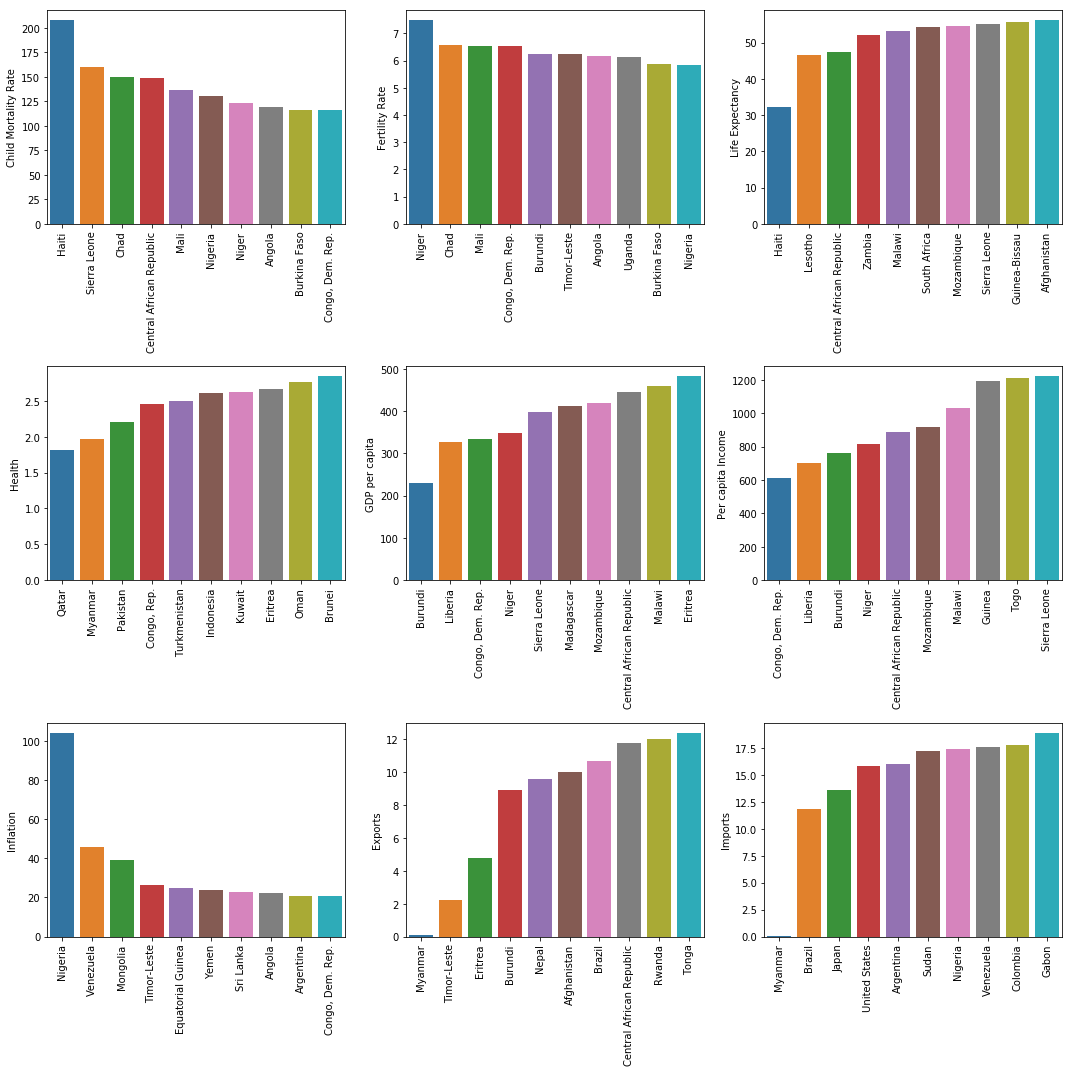

In [657]:
# Here we going to show lowest 10 countries of each variable in the form for plot.


fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000

child_mortality = country_Data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mortality, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: Children that would be born to each women
total_fertility = country_Data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= total_fertility, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: If the current mortality remains same, a new born child would remain alive

life_expectancy = country_Data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= life_expectancy, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health : Health as % of total GDP

health = country_Data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data = health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : GDP / Total population

gdp = country_Data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= gdp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

income = country_Data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: Annual growth rate of the Total GDP

inflation = country_Data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services.

exports = country_Data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. 

imports = country_Data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

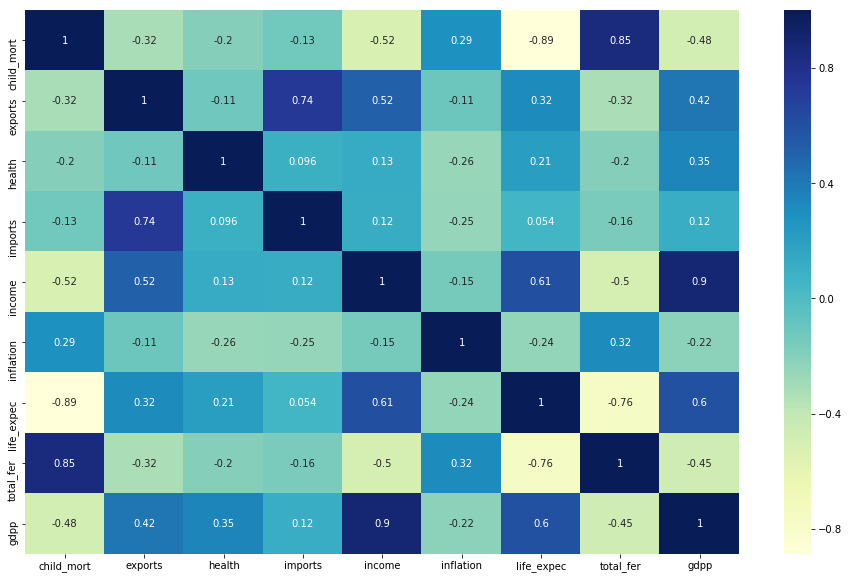

In [598]:
# Plot correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(country_Data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

### Outlier Analysis

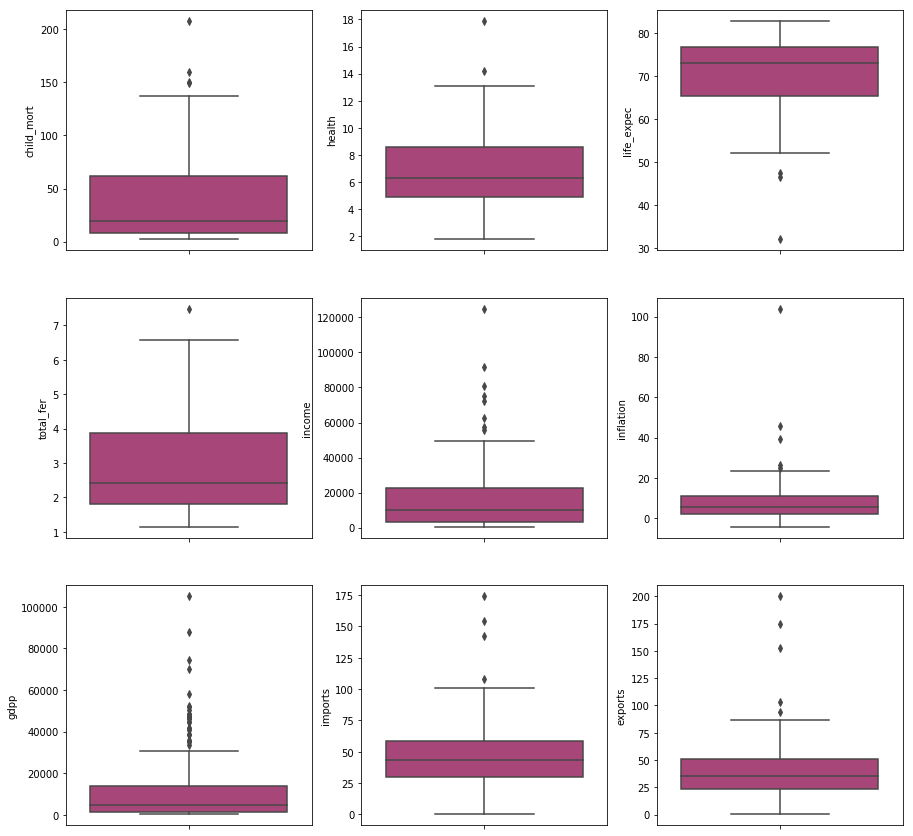

In [662]:
# Plot each column on boxplot to see outlier

plt.figure(figsize=(15,15))

def display_Box_plot(x,fig):
    plt.subplot(3,3,fig)
    sns.boxplot(country_Data[x], palette=("magma"),orient="v")

display_Box_plot('child_mort',1)
display_Box_plot('health',2)
display_Box_plot('life_expec',3)
display_Box_plot('total_fer',4)
display_Box_plot('income',5)
display_Box_plot('inflation',6)
display_Box_plot('gdpp',7)
display_Box_plot('imports',8)
display_Box_plot('exports',9)

We are not removing outlier or not doing any treatment with outlier.

In [600]:
# Before manipulating data, we will save one copy of orignal data.
new_country_Data = country_Data.copy()
new_country_Data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Scaling the data

In [601]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
columnslist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
new_country_Data[columnslist] = scaler.fit_transform(new_country_Data[columnslist])

In [602]:
new_country_Data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### Principal Component Analysis

In [603]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [604]:
# Droping 'country' variable and creating feature variable X
X = new_country_Data.drop(['country'],axis=1)

# Creating response variable to y
y = new_country_Data['country']

In [605]:
#Performing the PCA
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [606]:
#List of PCA components.
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [607]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [608]:
#Understanding how the original 4 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(X.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3': pca.components_[2],'PC4':pca.components_[3]})
pcs_df.head()

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.419519,0.192884,-0.029544,0.370653
1,exports,0.283897,0.613163,0.144761,0.003091
2,health,0.150838,-0.243087,-0.596632,0.461897
3,imports,0.161482,0.671821,-0.299927,-0.071907
4,income,0.398441,0.022536,0.301548,0.392159


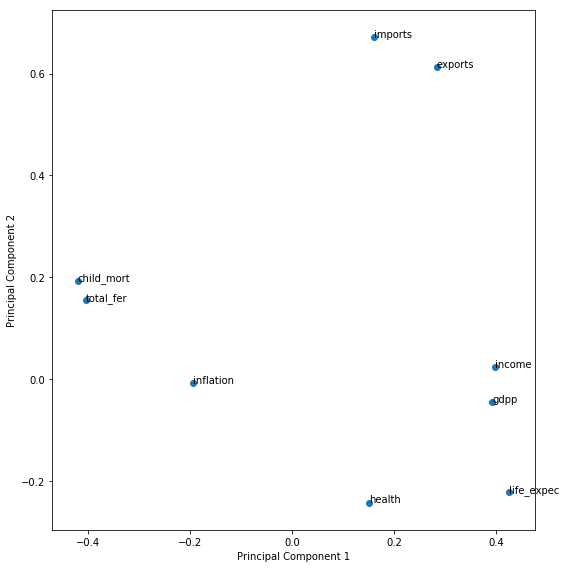

In [664]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

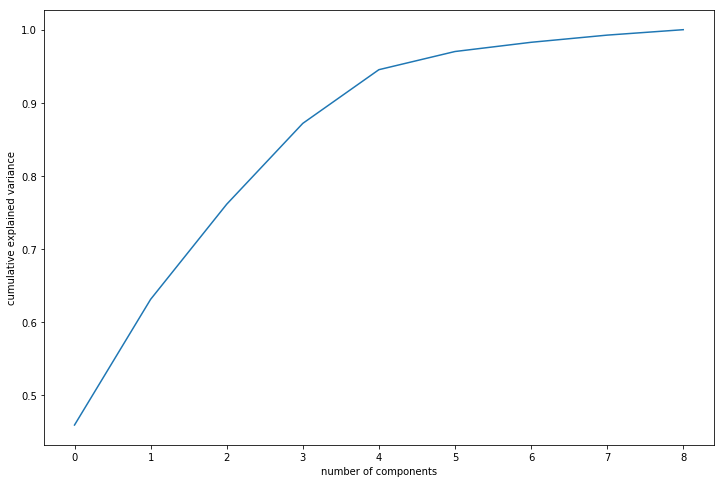

In [610]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here we can see that 4 components are enough to describe 95% of the variance in the dataset.

In [611]:
#Now dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [612]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [613]:
# df_pca

In [614]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [615]:
df_pca = pd.DataFrame({'PC1':df_pca[0],'PC2':df_pca[1],'PC3':df_pca[2],'PC4':df_pca[3]})
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [616]:
#creating correlation matrix for the principal components
pca_corrmat = np.corrcoef(df_pca.transpose())

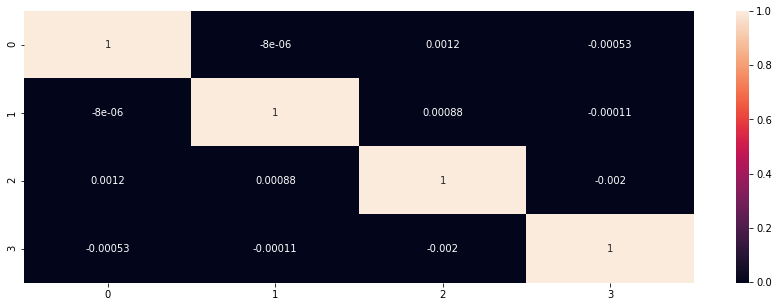

In [617]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,5))
sns.heatmap(pca_corrmat,annot = True)

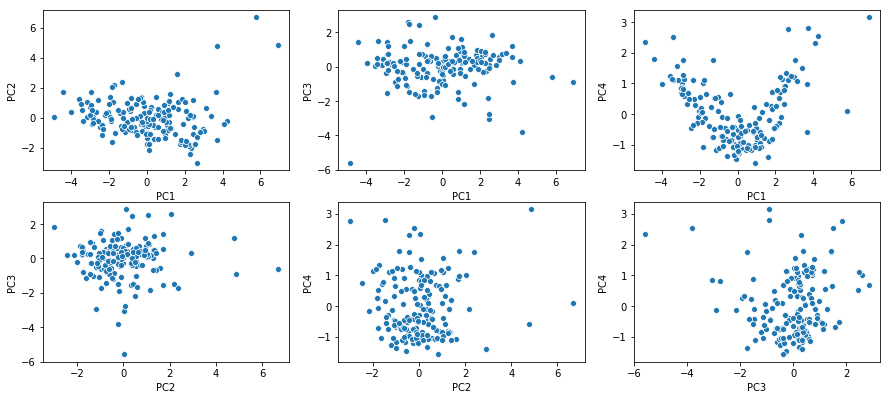

In [618]:
plt.figure(figsize=(15,10))

def display_scatterplot(xVar,yVar,fig):
    plt.subplot(3,3,fig)
    sns.scatterplot(x=xVar, y=yVar)
display_scatterplot(df_pca.PC1,df_pca.PC2,1)
display_scatterplot(df_pca.PC1,df_pca.PC3,2)
display_scatterplot(df_pca.PC1,df_pca.PC4,3)
display_scatterplot(df_pca.PC2,df_pca.PC3,4)
display_scatterplot(df_pca.PC2,df_pca.PC4,5)
display_scatterplot(df_pca.PC3,df_pca.PC4,6)

In [619]:
# 1s -> 0s in diagonals
corrmat_nodiag = pca_corrmat - np.diagflat(pca_corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543874 , min corr:  -0.002037829535552076


### KMeans clustering 

In [620]:
# importing KMeans clustering 
from sklearn.cluster import KMeans

In [621]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan



def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [622]:
# check the Hopkins measure
hopkins(df_pca)

0.8353637448725765

Here we can see that the value is > 0.5 the given dataset has a good tendency to form clusters.

In [623]:
df_pca_copy = df_pca

In [624]:
df_pca_copy.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [625]:
# Putting feature variable to X
X = new_country_Data.drop(['country'],axis=1)

# Putting response variable to y
y = new_country_Data['country']

In [626]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [627]:
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1,
       3, 0, 3, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0,
       0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 3, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 3, 3, 1, 1, 0, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       0, 0, 1, 1, 0, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 2, 3, 0, 3, 1, 0, 0, 3, 3, 1, 3, 0, 0, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1], dtype=int32)

In [628]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_pca_copy)
    sse_.append([k, silhouette_score(df_pca_copy, kmeans.labels_)])

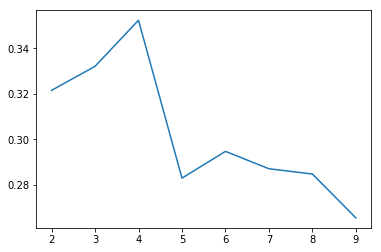

In [629]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [630]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.28735668921406704
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.29595170577528157
For n_clusters=5, the silhouette score is 0.29989832400700467
For n_clusters=6, the silhouette score is 0.23483551194665225
For n_clusters=7, the silhouette score is 0.24905003461730515
For n_clusters=8, the silhouette score is 0.24965335360202073


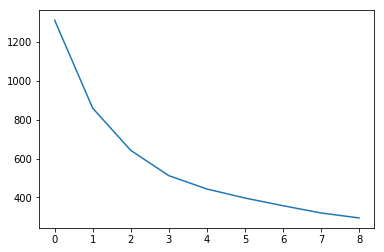

In [631]:
## From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca_copy)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [632]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(df_pca_copy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [633]:
dat=df_pca
dat.index = pd.RangeIndex(len(dat.index))
data_km = pd.concat([dat, pd.Series(model_clus2.labels_)], axis=1)
data_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
data_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,1
1,0.429358,-0.587859,0.321052,-1.171193,2
2,-0.282988,-0.446657,-1.225135,-0.850127,2
3,-2.930969,1.699437,-1.521734,0.875966,1
4,1.031988,0.130488,0.192922,-0.844808,2


In [634]:
data_km['ClusterID'].value_counts()

2    86
1    47
0    31
3     3
Name: ClusterID, dtype: int64

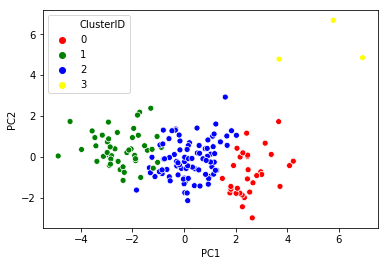

In [635]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km,palette = ['red','green','blue','yellow'])

In [636]:
data_merged=pd.merge(country_Data,dat_km, left_index=True,right_index=True)
data_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,2


In [637]:
data_merged=data_merged.drop(['PC1','PC2','PC3','PC4'],axis=1)
data_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [638]:
avg_child_mort = pd.DataFrame(data_merged.groupby(["ClusterID"]).child_mort.mean())
avg_child_mort

,child_mort
ClusterID,
0,4.903226
1,92.961702
2,21.598837
3,4.133333


### Hierarchical clustering

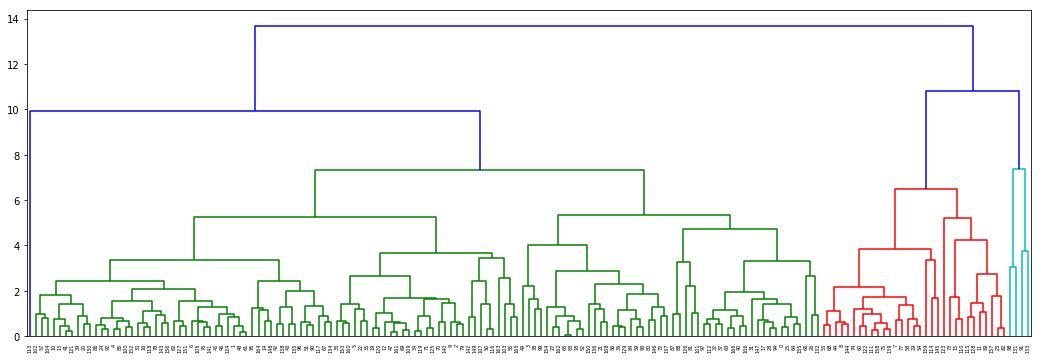

In [639]:
plt.figure(figsize=(18,6))
hierarchical_linkage = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(hierarchical_linkage)
plt.show()

Here we can see that the most optimum cut n = 5 is observed in the dedrogram.

In [640]:
cluster_Cut = pd.Series(cut_tree(hierarchical_linkage, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, cluster_Cut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,0


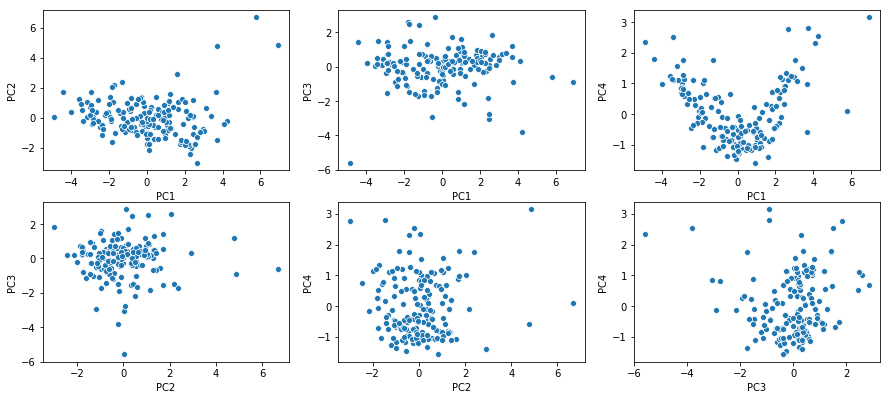

In [641]:
plt.figure(figsize=(15,10))

def display_scatterplot(xVar,yVar,fig):
    plt.subplot(3,3,fig)
    sns.scatterplot(x=xVar, y=yVar)
display_scatterplot(df_pca_hc.PC1,df_pca_hc.PC2,1)
display_scatterplot(df_pca_hc.PC1,df_pca_hc.PC3,2)
display_scatterplot(df_pca_hc.PC1,df_pca_hc.PC4,3)
display_scatterplot(df_pca_hc.PC2,df_pca_hc.PC3,4)
display_scatterplot(df_pca_hc.PC2,df_pca_hc.PC4,5)
display_scatterplot(df_pca_hc.PC3,df_pca_hc.PC4,6)

In [642]:
# concat 'new_country_Data' & 'df_pca_hc' data set
pca_cluster_hc = pd.concat([new_country_Data['country'],df_pca_hc], axis=1, join='outer', join_axes=None, 
                           ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, 
                           sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,0
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0


In [643]:
pca_cluster_hc['ClusterID'].value_counts()

0    131
1     31
3      2
2      2
4      1
Name: ClusterID, dtype: int64

In [644]:
#  Merging the main data set ie 'country_Data' with 'pca_cluster_hc'
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [645]:
clustered_data_hc['ClusterID'].value_counts()

0    131
1     31
3      2
2      2
4      1
Name: ClusterID, dtype: int64

### Analysis of the clusters

In [646]:
cluster_child_mort = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
cluster_exports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
cluster_health = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
cluster_imports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
cluster_income = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
cluster_inflation = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
cluster_life_expec = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
cluster_total_fer = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [647]:
df = pd.concat([pd.Series(list(range(0,5))), cluster_child_mort,cluster_exports,cluster_health,cluster_imports,cluster_income,
               cluster_inflation,cluster_life_expec,cluster_total_fer,cluster_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,46.137405,36.311443,6.417634,46.126457,9310.022901,8.090450,68.164122,3.206794,5222.015267
1,1,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
2,2,2.800000,187.500000,5.865000,158.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000
3,3,10.600000,123.400000,6.025000,131.000000,24350.000000,-0.190000,76.850000,1.765000,15950.000000
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


#### Analyses of "gdpp, child_mort and income" using scatterplot

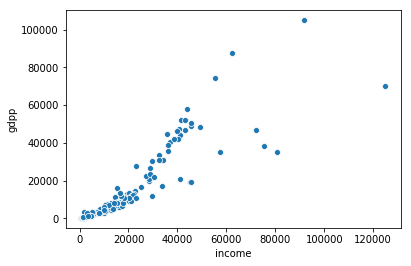

In [648]:
sns.scatterplot(x='income',y='gdpp',data=clustered_data_hc)

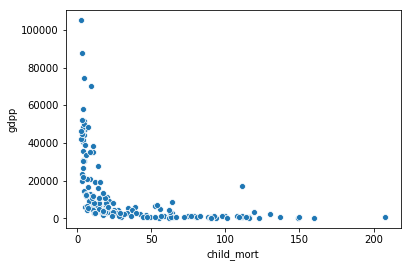

In [649]:
sns.scatterplot(x='child_mort',y='gdpp',data=clustered_data_hc)

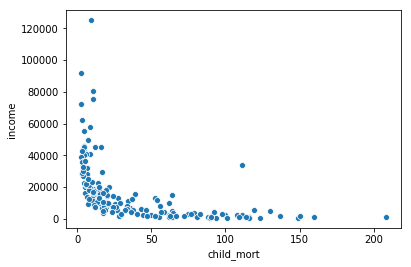

In [650]:
sns.scatterplot(x='child_mort',y='income',data=clustered_data_hc)

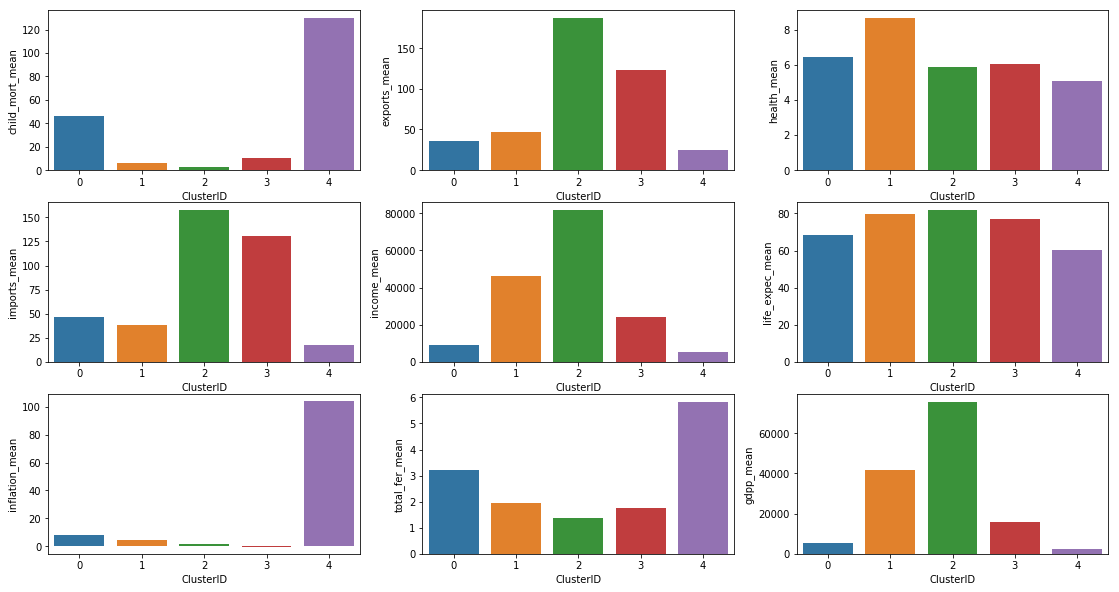

In [651]:
plt.figure(figsize=(19,10))

def display_bar_plot(yVar,fig):
    plt.subplot(3,3,fig)
    sns.barplot(x=df.ClusterID, y=yVar )

display_bar_plot(df.child_mort_mean,1)
display_bar_plot(df.exports_mean,2)
display_bar_plot(df.health_mean,3)
display_bar_plot(df.imports_mean,4)
display_bar_plot(df.income_mean,5)
display_bar_plot(df.life_expec_mean,6)
display_bar_plot(df.inflation_mean,7)
display_bar_plot(df.total_fer_mean,8)
display_bar_plot(df.gdpp_mean,9)


In [652]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', '

Recommendations

    1-Cluster with ClusterID as 0, is the cluster of most backward country.
    2-Countries on which we require to focus more are
    
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Lithuania', 'Macedonia, FYR', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania',
       'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Niger', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Romania', 'Russia', 'Rwanda', 'Samoa',
       'Senegal', 'Serbia', 'Sierra Leone', 'Slovak Republic', 'Slovenia',
       'Solomon Islands', 'South Africa', 'South Korea', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Sudan', 'Suriname',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
       'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Yemen', 'Zambia'